In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/use_feature_data_wrapper.csv")

In [2]:
df

,image,emotion,a_nose_leyebrow,a_nose_reyebrow,angle_right_eyebrow,average_distance,d_bottom_mouth_chin,d_first_eyebrow_leye,d_first_eyebrow_reye,dis_c_lmouth_nose,h_chin,h_mouth,mouth_distance,size_left_eye,size_right_eye,w_right_eye
0,facial-expressions_2868585k.jpg,7,0.835357,1.249046,0.741947,57.849661,27.073973,29.068884,28.460499,54.083269,80.156098,53.084838,-28.666667,20.048945,19.091883,36.055513
1,facial-expressions_2868582k.jpg,3,0.682317,1.016489,0.702257,38.702801,31.064449,24.839485,24.698178,51.429563,54.083269,23.021729,-3.000000,17.693473,16.741736,36.055513
2,Aaron_Peirsol_0003.jpg,4,0.680521,1.315614,0.785398,48.809134,44.553339,25.495098,23.769729,50.159745,75.663730,31.144823,-13.333333,14.317438,14.932573,31.400637
3,Aaron_Sorkin_0002.jpg,4,0.785398,1.037088,0.748378,54.846611,37.121422,21.954498,25.553865,57.271284,80.224684,43.104524,-20.000000,15.636488,15.273360,39.000000
4,Abdel_Nasser_Assidi_0002.jpg,5,1.147942,1.335251,1.158386,37.752899,51.662365,27.658633,25.709920,43.462628,70.880181,19.313208,1.666667,15.811388,16.428563,33.955854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24068,SURPRISE/surprise (971).png,7,0.892677,1.349968,0.935770,44.369616,45.398238,47.095647,50.219518,59.033889,79.227520,34.000000,-3.333333,24.768364,26.208735,49.091751
24069,SURPRISE/surprise (978).jpg,7,0.933248,1.313473,0.938047,63.395024,25.079872,37.483330,39.293765,51.224994,76.026311,51.000000,-19.666667,18.207012,17.859781,36.221541
24070,SURPRISE/surprise (981).png,7,0.694738,0.927295,0.588003,75.326098,21.931712,25.079872,30.000000,51.613952,92.395887,71.344236,-47.666667,20.890573,21.360331,41.000000
24071,SURPRISE/surprise (983).jpg,7,0.856706,1.409421,1.046001,65.942962,22.203603,43.011626,43.566042,58.137767,77.103826,55.009090,-23.333333,24.062410,23.693433,45.044423


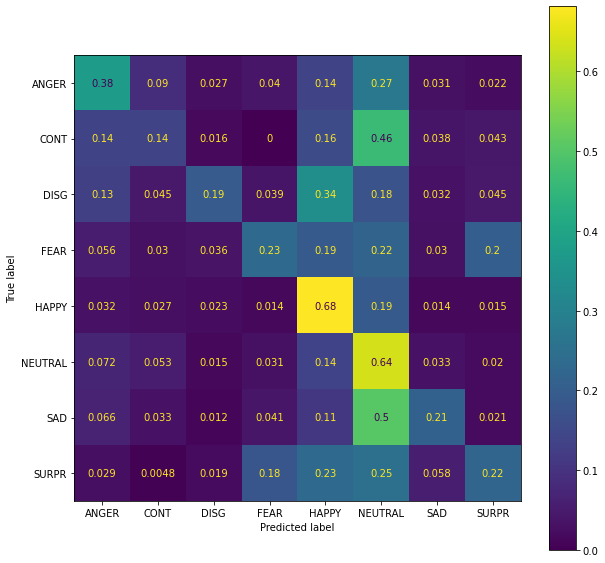

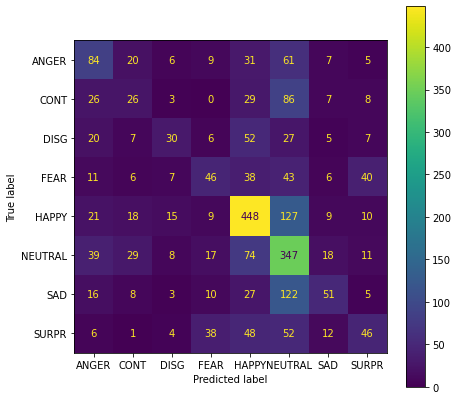

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# create model
clf = RandomForestClassifier(n_estimators=40)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(7,7))
disp.plot(ax=ax)
plt.show()
#plt.savefig('evaluate_matrix/rf.jpg')

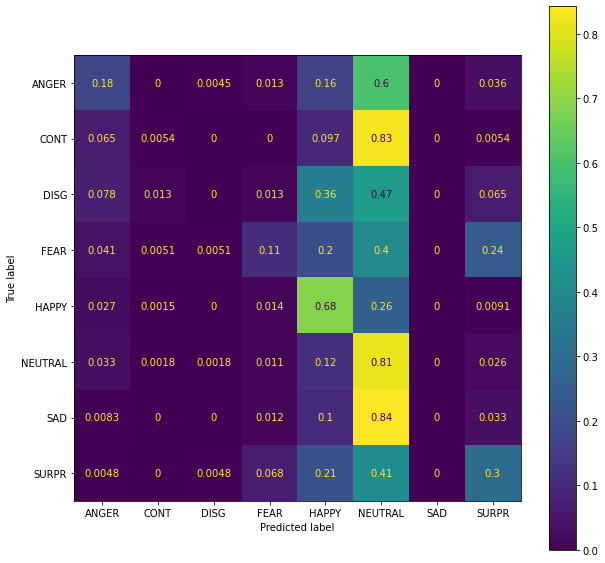

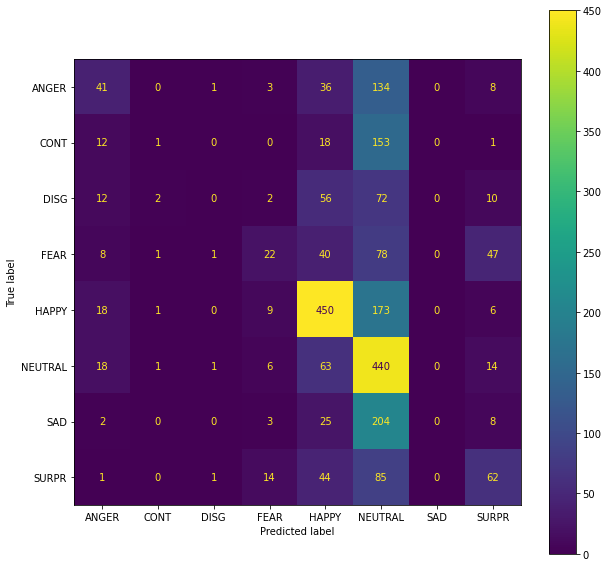

In [4]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='poly', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

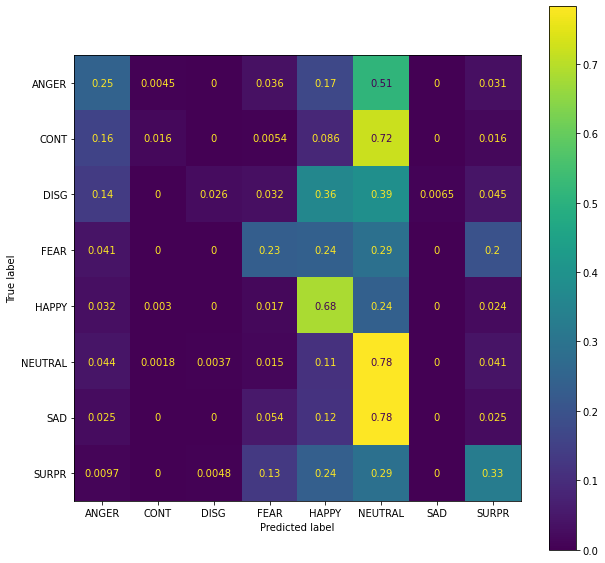

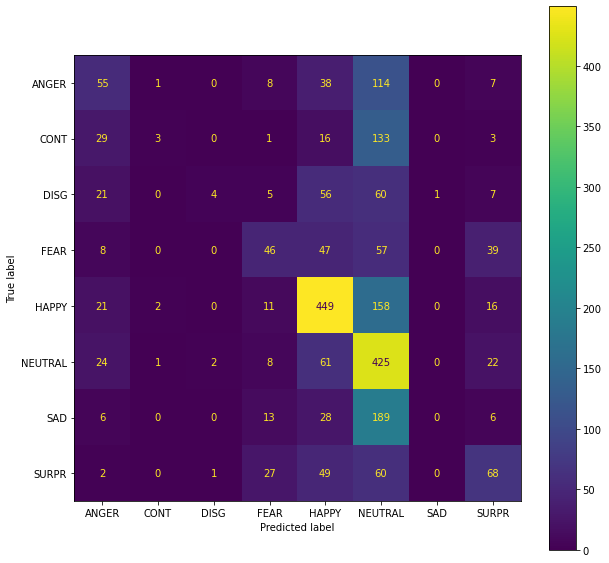

In [5]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='linear', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

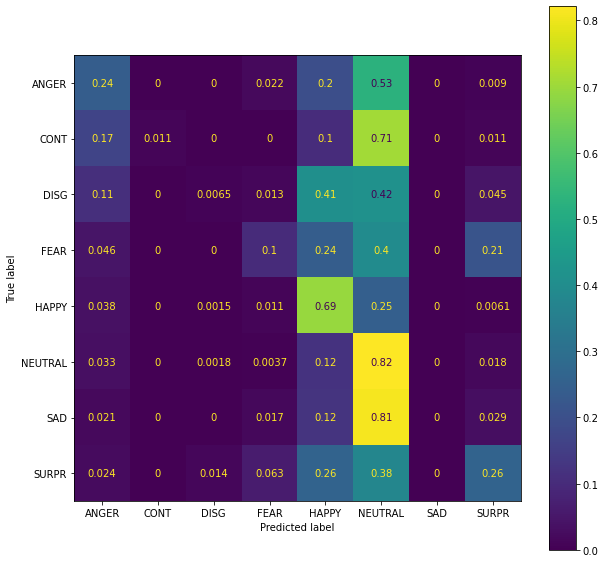

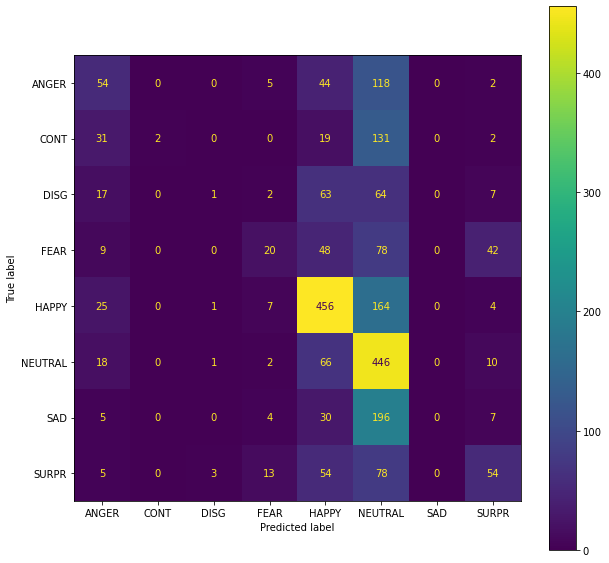

In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = svm.SVC(kernel='rbf', C=1, probability=True)

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


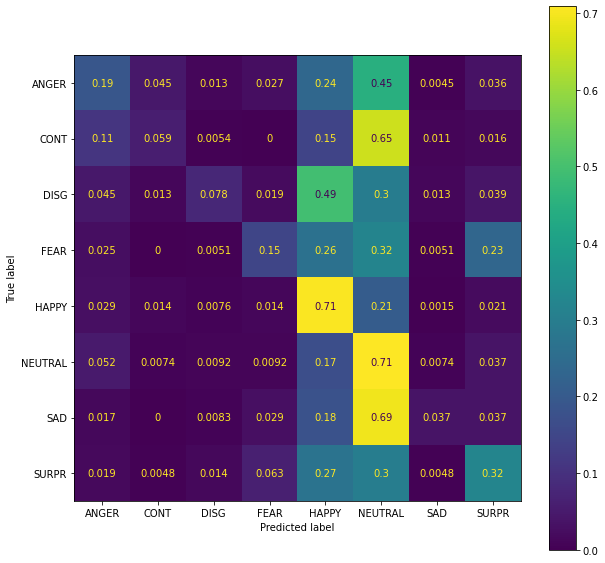

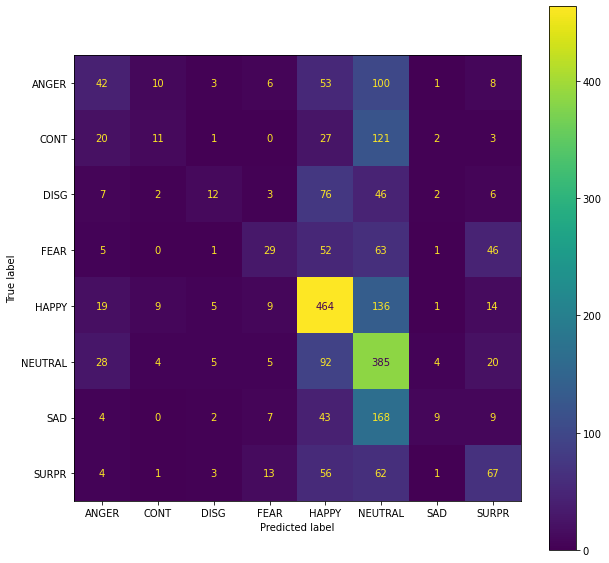

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = LogisticRegression()

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

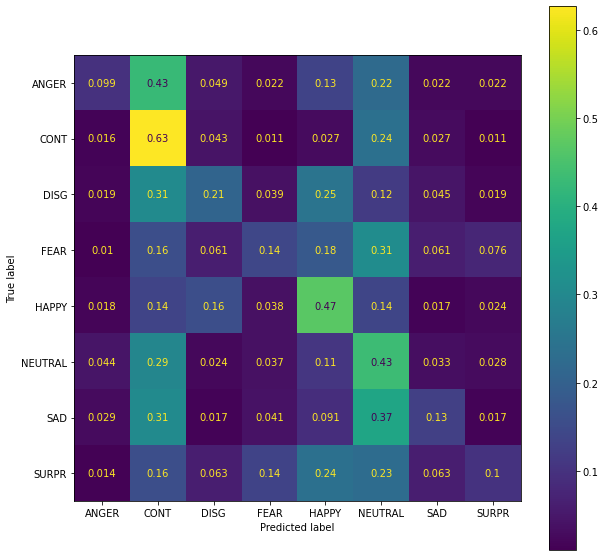

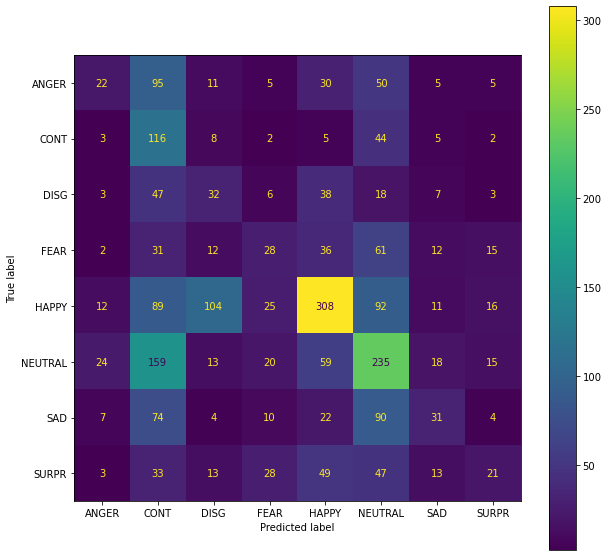

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# create model
clf = GaussianNB()

dictionary = ['ANGER', 'CONT', 'DISG', 'FEAR', 'HAPPY',  'NEUTRAL', 'SAD', 'SURPR']

emo_feature = []
emo_target = []

count = 0
for i in range(len(df['emotion'])):
    emo_target.append(df['emotion'][i])    
    
    data = []
    for j in range(2, len(df.columns)):
        data.append(df._get_value(i, j, takeable = True))
    emo_feature.append(data)

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

#fit model
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

#plot matrix float
cm = confusion_matrix(y_test, predict, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

#plot matrix num
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dictionary)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()